# Анализ оттока клиентов банка "Метанпром"

**Исходные данные:** Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Задача:** Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

## Материалы
**Презентация:** https://disk.yandex.ru/i/jBTKRrnyp021cg

**Дашборд:** https://public.tableau.com/views/_16821068631580/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Введение. Формирование техзадания и проработка запроса

Существует проблема оттока клиентов банка «Метанпром». Данный банк располагается в Ярославле и областных городах: Ростов и Рыбинск. Клиент считается ушедшим, если он подал заявление на закрытие договора.

**Заказчик исследования** - отдел маркетинга банка, который на основе нашего анализа будет разрабатывать меры по удержанию клиентов.

**Цель исследования:** Провести анализ причин ухода и составить портрет клиента, склонного к оттоку.

**Ход исследования:**

- Обработка и подготовка исходных данных к анализу; 
- Проанализировать признаки, влияющие на отток; 
- Сформулировать и проверить статистические гипотезы, влияющие на отток клиентов; 
- Сегментировать клиентов, склонных к отоку;
- Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами

После каждого проделанного шага будут оставлены комментарии, а после каждой части исследования - необходимые выводы. В конце всего исследования будут даны необходимые рекомендации



## Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
    data = pd.read_csv(path)
    
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Вывод по разделу:** В данных 10000 строк, есть пропуски, требуется предобработка.

## Предобработка данных

### Проверить корректность наименований колонок и переименовать при необходимости

In [4]:
data.columns

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

In [5]:
# переименуем два столбца
data = data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Колонки:

- `user_id` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity`  — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `est_salary` — заработная плата клиента,
- `churn` — ушёл или нет, 1 - ушел, 0 - остался.

### Исследовать пропущенные значения и заменить при необходимости

In [6]:
# проверим пропуски
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

**В 'age' 26 пропусков. Посмотрим что с этим можно сделать.**

In [7]:
data[data['age'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Причиной пропусков скорее всего является технический сбой. При пропусках в возрасте обращает на себя внимание баланс на счете - там по большей части тоже пропуски. Однако поскольку пропусков в balance во всем датасете - 2295, то никаких выводов  о взаимосвязи пропусков в возрасте и в балансе я бы не делала.

In [8]:
data['age'].describe()

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

Разброс в возрасте большой, от 18 до 86 лет. Пропусков мало, всего 26 из 10 000 строк. Можно и удалить,  но заменим медианой, ведь чем меньше данных мы потеряем, тем лучше.

In [9]:
data['age'] = data['age'].fillna(data['age'].median())

**Изучим пропуски в колонке balance.**

In [10]:
data[data['balance'].isnull()].head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0


Видно, что в строках с пропусками в 'balance' остальные данные заполнены. 

Кстати, проверим, сколько клиентов с нулевым балансом.

In [11]:
data.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


Всего двое, при этом они пользуются двумя продуктами, есть кридитка и уходить пока не собираются.

Возможно, что пропуски в 'balance' - это нули, но это не точно. И если в дальнейшим анализе пропуски в 'balance' нам не помешают, оставим все как есть. А в рекомендациях отметим вероятность технического сбоя при выгрузке данных.

In [12]:
print('Доля пропусков в столбце balance составляет:', round(data['balance'].isna().sum()/len(data), 2))

Доля пропусков в столбце balance составляет: 0.23


23% это много.

Чуть более подробно посмотрим в 'balance' на данные без пропусков.

In [13]:
data['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

Ничего себе, у кого-то на счету лежит 119 млн!

### Исследовать соответствие типов и привести в соответствие

In [14]:
# изменим тип данных столбца 'score' на int
data['score'] = data['score'].astype(int)

# изменим тип данных столбца 'age' на int
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Проверить на дубликаты, явные и неявные

In [15]:
# проверим явные дубликаты
data.duplicated().sum()

0

Поищем неявные дубликаты

In [16]:
data['user_id'].duplicated().sum()

73

In [17]:
dubl_id = data[data[['user_id']].duplicated(keep=False)].sort_values(by='user_id')
dubl_id

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1
8497,227795,839,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0
6457,228075,839,Рыбинск,М,39,5,507199.85,3,0,1,85195.80,0


Думаю, корректно будет удалить дубли.

In [18]:
# выделим индексы строк на удаление
dubl_id.drop_duplicates(subset=['user_id']).index

Int64Index([1893, 7542, 5896, 1411, 8164, 4850, 8785, 3988,  904, 7487, 9819,
            2276, 4343, 5369, 8364,  946, 9267, 5495,  690, 5197, 9363, 3936,
            8733, 6786, 6670,   58, 5020,  790, 9653, 2941, 7753, 8705, 9146,
             150, 9632, 9380, 2165, 5454,  231, 7931, 2226, 4870, 8015, 8822,
            9035, 9301, 5889, 1513, 1580, 5570, 3230, 8521, 1837, 4986, 6685,
            1359, 7409, 8293, 9880, 4611, 4186, 4623,    7, 1010, 1740, 1389,
             440, 9634, 9104, 8070, 4216, 8205, 6457],
           dtype='int64')

In [19]:
# удалим дубли по индексам строк
data = data.drop(index = dubl_id.drop_duplicates(subset=['user_id']).index).reset_index(drop=True)

In [20]:
# проверим как получилось
data['user_id'].duplicated().sum()

0

На всякий случай проверим столбец 'city' на неявные дубликаты

In [21]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Нет, тут все четко, идем дальше.

### Кодирование категориальных данных

Приведем столбцы gender, city к бинарному виду

In [22]:
# для столбца 'gender' сначала заменим соответственно значения "М" и "Ж" на "1" и "0":
data['gender'] = data['gender'].replace("М", '1')
data['gender'] = data['gender'].replace("Ж", '0')

# приведем к типу 'int'
data['gender'] = data['gender'].astype('int')
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,1,34,5,174.00,1,1,0,67353.16,1


In [23]:
# для столбца 'city 'сделаем разбивку по городам
data = pd.get_dummies(data)
data.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,0,0,1


In [24]:
# переименуем получившиеся столбцы
data =  data.rename(columns={'city_Ростов':'Ростов', 'city_Рыбинск':'Рыбинск', 'city_Ярославль':'Ярославль'})
data.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,0,0,1


**Вывод по разделу:**

- Переменованы колонки, типы данных приведены в соответствие, исследованы и обработаны пропущенные значения, найдены и обработаны неявные дубликаты.
- Также проанализированы причины пропусков - возможный технический сбой при выгрузке данных.
- Для дальнейшего анализа было проведено кодирование категориальных данных.


## Исследовательский анализ данных (EDA)

### Анализ распределений показателей клиентов банка

Посмотрим, есть ли выбросы в данных в 'balance' и в 'est_salary'

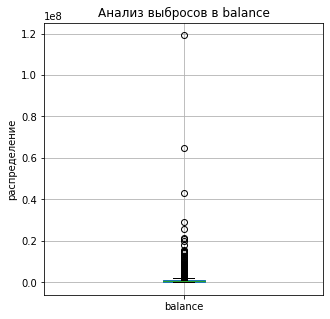

In [25]:
data.boxplot(column=['balance'], figsize=(5, 5))
plt.title('Анализ выбросов в balance')
plt.ylabel('распределение')
plt.show()

In [26]:
np.percentile(data['est_salary'], 95)

316308.942

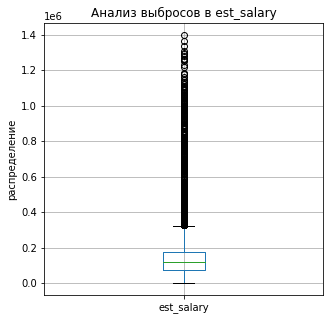

In [27]:
data.boxplot(column=['est_salary'], figsize=(5, 5))
plt.title('Анализ выбросов в est_salary')
plt.ylabel('распределение')
plt.show()

Да, есть выбросы в обоих признаках. Если в дальнейшем анализе они не будут портить картину, то удалять не будем, а укажем в рекомендациях. Ведь помимо выбросов в балансе есть еще и пропуски, а данные по зарплате заполнялись моделью, и могут быть ошибки, которые следует доработать.

Построим гистограммы распределения каждой величины в разбивке по churn

In [28]:
sns.set_theme(style="darkgrid")
sns.set_palette(['cornflowerblue','green'])

In [29]:
# Напишем функцию, которая строит гистограммы распределения признаков
def function_hist(data, column):
    sns.displot(data, x=column, hue='churn')
    plt.title('Распределение '+name, fontsize=13)
    plt.xlabel(name)
    plt.ylabel('Распределение')
    plt.legend({'Ушли', 'Остались'})
    plt.show()

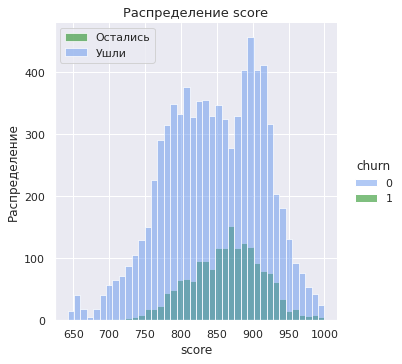

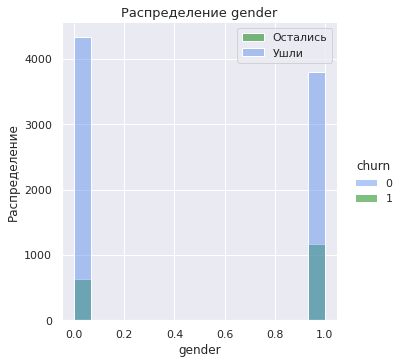

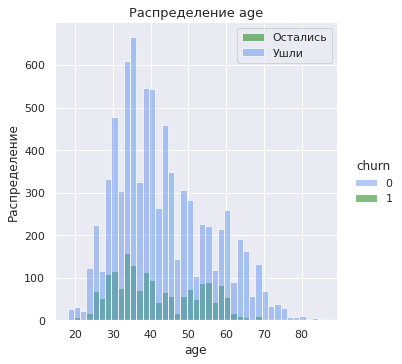

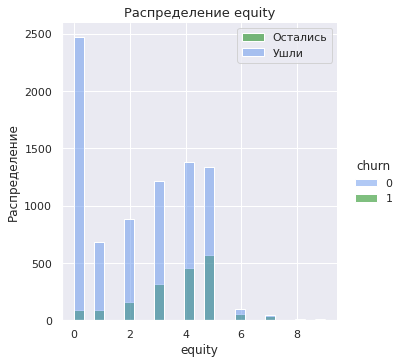

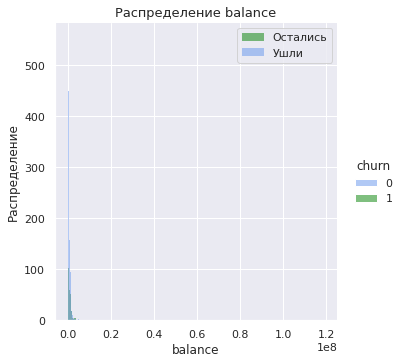

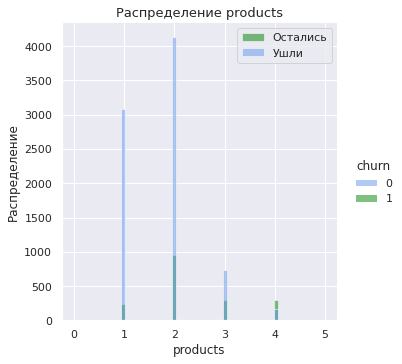

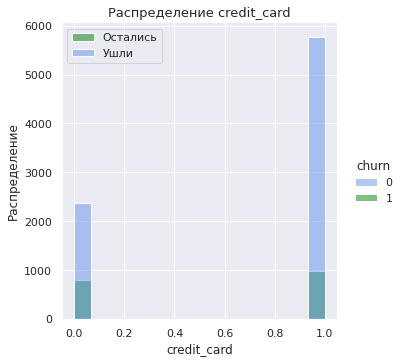

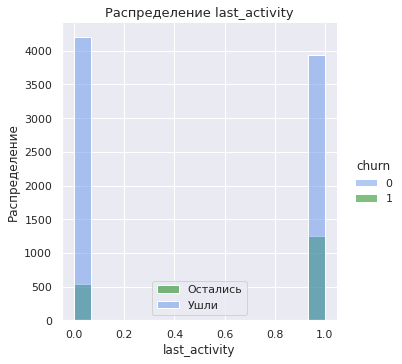

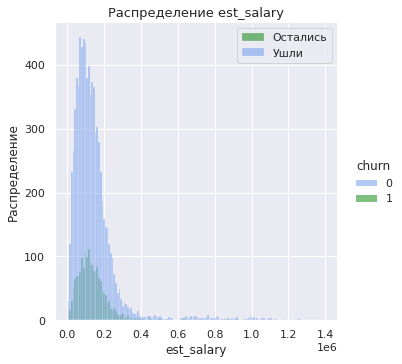

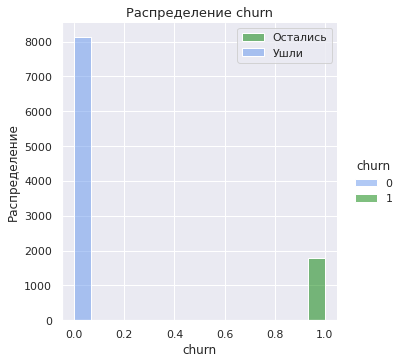

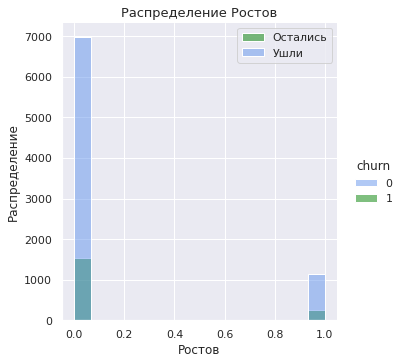

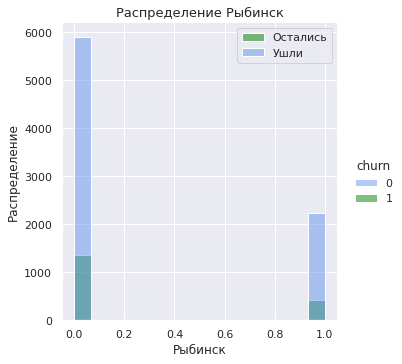

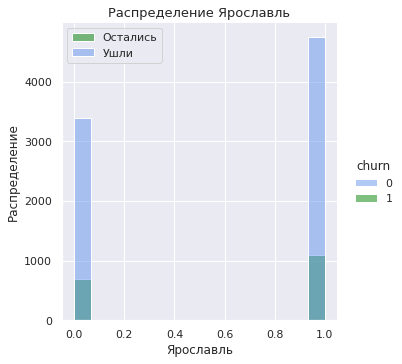

In [30]:
for name in data.columns[1::]:
    function_hist(data,name)

**по графикам можно сделать следующие выводы:**

- мужчин уходит больше, чем женщин;
- больше всего уходят клиентов с 5 и выше баллами собственности, имеющие 3-4 банковских продукта;
- больше уходит клиентов, не имеющих кредитную карту;
- больше уходит активных клиентов, чем неактивных.

### Корреляционный анализ данных на вероятность ухода

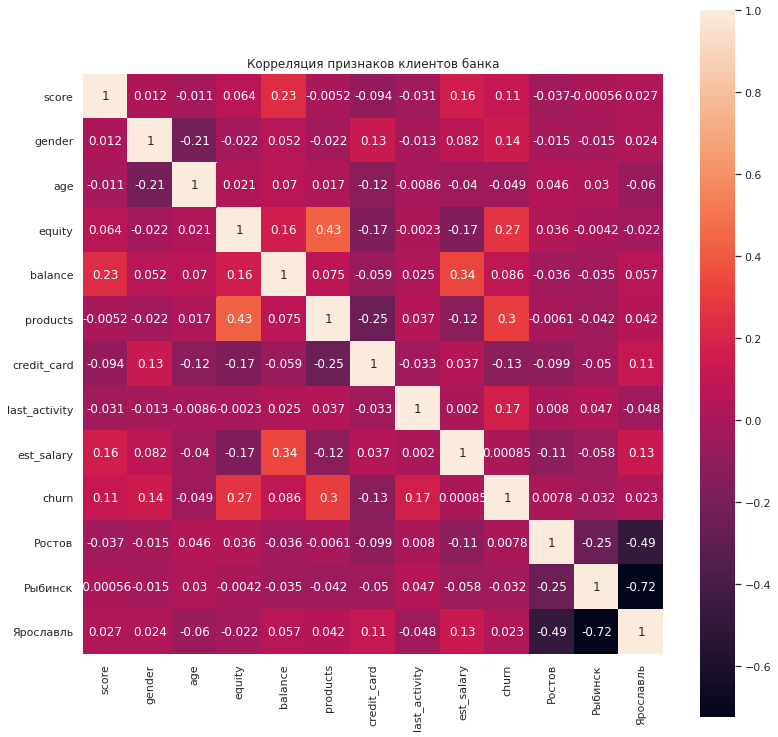

In [31]:
cm = data.drop('user_id', axis=1).corr()
fig, test = plt.subplots()
test.set_title('Корреляция признаков клиентов банка')
fig.set_figheight(13)
fig.set_figwidth(13)
sns.heatmap(cm, annot = True, square=True)
plt.show()

сильная корреляция от ±0,7 до ±1

средняя корреляция от ±0,3 до ±0,699

слабая корреляция от ±0,1 до ±0,299

Признаки практически не коррелируют между собой. 

Слабая положительная корреляция наблюдается между оттоком и полом, количеством баллов собственности, активностью клиента. 

Чуть сильнее связь между оттоком и количеством продуктов.

**Вывод по разделу**

Изучены выбросы в колонках 'est_salary' и 'balance'

Построены гистограммы распределения данных в разбивке по 'churn'

Проведен корреляционный анализ на вероятность ухода

Было выявлено, что:
- мужчин уходит больше, чем женщин;
- больше всего уходят клиентов с 5 и выше баллами собственности, имеющие 3-4 банковских продукта;
- больше уходит клиентов, не имеющих кредитную карту;
- больше уходит активных клиентов, чем неактивных.

## Статистический анализ. Проверка гипотез

### Сформулировать и проверить статистические гипотезы, влияющие на отток клиентов

**Гипотеза 1: Средние зарплаты ушедших и оставшихся клиентов одинаковые**

H0: средние зарплаты оставшихся и ушедших клиентов равны

H1: средние зарплаты оставшихся и ушедших клиентов отличаются

In [32]:
salary_left = data.query('churn == 1')[['est_salary']]
salary_stay = data.query('churn == 0')[['est_salary']]

alpha = 0.05

results = st.ttest_ind(salary_left, salary_stay, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: [0.92575021]
Не получилось отвергнуть нулевую гипотезу


Таким образом, средние зарплаты оставшихся и ушедших клиентов одинаковые.

**Гипотеза 2: Среднее количество продуктов у ушедших и оставшихся клиентов одинаковое**

H0: среднее количество продуктов у оставшихся и ушедших клиентов равны

H1: среднее количество продуктов у оставшихся и ушедших клиентов отличаются

In [33]:
products_left = data.query('churn == 1')[['products']]
products_stay = data.query('churn == 0')[['products']]

alpha = 0.05

results = st.ttest_ind(products_left, products_stay, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: [1.03702088e-135]
Отвергаем нулевую гипотезу


Таким образом, среднее количество продуктов у оставшихся и ушедших клиентов отличаются.

По поводу alpha=0.05

Альфа-уровень — это вероятность ошибочного отклонения истинной нулевой гипотезы. Увеличение альфа-уровня теста увеличивает вероятность того, что мы сможем найти значимый результат теста, но также увеличивает вероятность того, что мы ошибочно отклоним истинную нулевую гипотезу.

0.05 - это наиболее распространенный выбор альфа-уровня проверки гипотезы.

Чтобы опустить его порог до 0,01 нужны веские причины для перестраховки. У нас не тот случай, когда неправильные выводы влекут за собой серьезные последствия, как например в медицине. Поэтому считаю выбор alpha=0.05 вполне оправданным.

## Промежуточный итог: какие показатели влияют на отток клиентов

Подведем промежуточные итоги. На отток клиентов влияют:
- gender: мужчин уходит больше, чем женщин;
- equity: основная масса ушедших клиентов с 5 и выше баллами собственности;
- products: ушедшие клиенты имеют банковские продукты;
- credit_card: ушедшие клиентов как правило не имеют кредитную карту;
- last_activity: среди ушедших клиентов больше активных, чем неактивных.

## Сегментация клиентов

### Выделение сегментов

Посмотрим на средние значения в двух группах (тех, кто ушел, и тех, кто остался) по портретным признакам клиентов. Если средние будут сильно отличаться, это послужит поводом для выделения в сегменты.

In [34]:
print('Общий портрет клиентов:')
data.groupby(['churn']).median()

Общий портрет клиентов:


,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль
churn,,,,,,,,,,,,,
0,173152.5,848.0,0.0,40.0,3.0,475382.445,2.0,1.0,0.0,118224.635,0,0,1
1,170460.0,866.0,1.0,39.0,4.0,781540.965,2.0,1.0,1.0,124997.370,0,0,1


**Сегмент 1: активные клиенты, мужчины**

In [35]:
segment_1 = data.query('last_activity == 1 & gender == 1')

Также на основании корреляционного анализа включим в сегментацию показатели по количеству продуктов, наличию кредитной карты и баллы собственности

**Сегмент 2: клиенты не имеющие кредитную карту**

In [36]:
segment_2 = data.query('credit_card == 0')

**Сегмент 3: клиенты с баллами собственности от 5 и выше**

In [37]:
segment_3 = data.query('equity >= 5')

**Сегмент 4: клиенты имеющие банковские продукты от 3 и выше**

In [38]:
segment_4 = data.query('products >= 3')

### Приоритизация сегментов по оттоку

**Посчитаем общий отток**

In [39]:
# посчитаем общий отток
print('Общий отток в данных:', len(data.query('churn == 1')))

Общий отток в данных: 1791


In [40]:
print('Доля общего оттока в данных:', round(len(data.query('churn == 1'))/len(data), 2))

Доля общего оттока в данных: 0.18


**Исследуем сегмент 1**

In [41]:
print('Количество клиентов в сегменте_1:',len(segment_1))

Количество клиентов в сегменте_1: 2560


In [42]:
print('Количество ушедших в сегменте_1:', len(segment_1.query('churn == 1')))

Количество ушедших в сегменте_1: 759


In [43]:
print('Доля ушедших в сегменте 1:', round(len(segment_1.query('churn == 1'))/len(segment_1), 2))

Доля ушедших в сегменте 1: 0.3


In [44]:
print('Доля ушедших в сегменте 1 относительно общего оттока:', \
      round(len(segment_1.query('churn == 1'))/len(data.query('churn == 1')), 2))

Доля ушедших в сегменте 1 относительно общего оттока: 0.42


**Исследуем сегмент 2**

In [45]:
print('Количество клиентов в сегменте_2:',len(segment_2))

Количество клиентов в сегменте_2: 3174


In [46]:
print('Количество ушедших в сегменте_2:', len(segment_2.query('churn == 1')))

Количество ушедших в сегменте_2: 802


In [47]:
print('Доля ушедших в сегменте 2:', round(len(segment_2.query('churn == 1'))/len(segment_2), 2))

Доля ушедших в сегменте 2: 0.25


In [48]:
print('Доля ушедших в сегменте 2 относительно общего оттока:', \
      round(len(segment_2.query('churn == 1'))/len(data.query('churn == 1')), 2))

Доля ушедших в сегменте 2 относительно общего оттока: 0.45


**Исследуем сегмент 3**

In [49]:
print('Количество клиентов в сегменте_3:',len(segment_3))

Количество клиентов в сегменте_3: 2173


In [50]:
print('Количество ушедших в сегменте_3:', len(segment_3.query('churn == 1')))

Количество ушедших в сегменте_3: 674


In [51]:
print('Доля ушедших в сегменте 3:', round(len(segment_3.query('churn == 1'))/len(segment_3), 2))

Доля ушедших в сегменте 3: 0.31


In [52]:
print('Доля ушедших в сегменте 3 относительно общего оттока:', \
      round(len(segment_3.query('churn == 1'))/len(data.query('churn == 1')), 2))

Доля ушедших в сегменте 3 относительно общего оттока: 0.38


**Исследуем сегмент 4**

In [53]:
print('Количество клиентов в сегменте_4:',len(segment_4))

Количество клиентов в сегменте_4: 1518


In [54]:
print('Количество ушедших в сегменте_4:', len(segment_4.query('churn == 1')))

Количество ушедших в сегменте_4: 597


In [55]:
print('Доля ушедших в сегменте 4:', round(len(segment_4.query('churn == 1'))/len(segment_4), 2))

Доля ушедших в сегменте 4: 0.39


In [56]:
print('Доля ушедших в сегменте 4 относительно общего оттока:', \
      round(len(segment_4.query('churn == 1'))/len(data.query('churn == 1')), 2))

Доля ушедших в сегменте 4 относительно общего оттока: 0.33


Соберем данные анализа сегментов в одной таблице

In [57]:
df = pd.DataFrame(
    [['segment_1',
      len(segment_1),
      round(len(segment_1.query('churn == 1'))/len(segment_1), 2), 
      1-round(len(segment_1.query('churn == 1'))/len(segment_1), 2),
      round(len(segment_1.query('churn == 1'))/len(data.query('churn == 1')), 2)],
     ['segment_2', 
      len(segment_2),
      round(len(segment_2.query('churn == 1'))/len(segment_2), 2), 
      1-round(len(segment_2.query('churn == 1'))/len(segment_2), 2),
      round(len(segment_2.query('churn == 1'))/len(data.query('churn == 1')), 2)], 
     ['segment_3',
      len(segment_3),
      round(len(segment_3.query('churn == 1'))/len(segment_3), 2), 
      1-round(len(segment_3.query('churn == 1'))/len(segment_3), 2),
      round(len(segment_3.query('churn == 1'))/len(data.query('churn == 1')), 2)],
     ['segment_4',
      len(segment_4),
      round(len(segment_4.query('churn == 1'))/len(segment_4), 2), 
      1-round(len(segment_4.query('churn == 1'))/len(segment_4), 2),
      round(len(segment_4.query('churn == 1'))/len(data.query('churn == 1')), 2)]],
    columns=['segment', 'size', 'share_left', 'share_stay', 'share_left_in_all'])
df.sort_values(by='share_left_in_all', ascending=False)

,segment,size,share_left,share_stay,share_left_in_all
1,segment_2,3174,0.25,0.75,0.45
0,segment_1,2560,0.30,0.70,0.42
2,segment_3,2173,0.31,0.69,0.38
3,segment_4,1518,0.39,0.61,0.33


Собрать данные можно и через цикл

In [58]:
dict_sample = {1: segment_1, 2: segment_2, 3: segment_3, 4: segment_4}

In [59]:
cols = ['segment', 'size', 'share_left', 'share_stay', 'share_left_in_all']

N = 4
dat = pd.DataFrame(columns = cols)
for i in range(N):

    dat = dat.append({'segment': str(i+1),
                     'size': len(dict_sample[i+1]),
                     'share_left': round(len(dict_sample[i+1].query('churn == 1'))/len(dict_sample[i+1]), 2),
                     'share_stay': 1-round(len(dict_sample[i+1].query('churn == 1'))/len(dict_sample[i+1]), 2),
                     'share_left_in_all': round(len(dict_sample[i+1].query('churn == 1'))/len(data.query('churn == 1')), 2)
                     },ignore_index=True)
dat    

,segment,size,share_left,share_stay,share_left_in_all
0,1,2560,0.30,0.70,0.42
1,2,3174,0.25,0.75,0.45
2,3,2173,0.31,0.69,0.38
3,4,1518,0.39,0.61,0.33


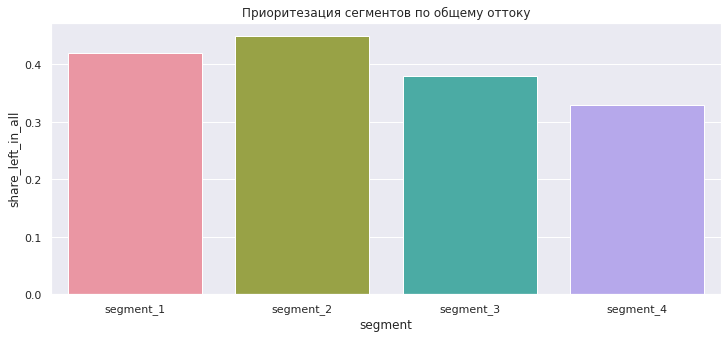

In [60]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.barplot(x='segment', y='share_left_in_all', data=df)
ax.set_title('Приоритезация сегментов по общему оттоку')
plt.show()

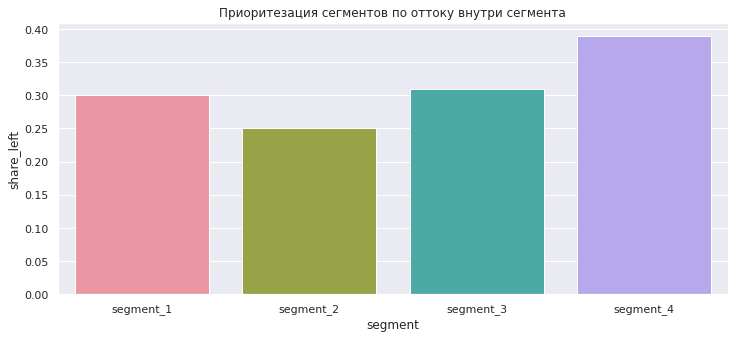

In [61]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.barplot(x='segment', y='share_left', data=df)
ax.set_title('Приоритезация сегментов по оттоку внутри сегмента')
plt.show()

Размеры сегментов неодинаковые. Поэтому следует рассматривать данные по ним в двух плоскостях: относительно общего оттока и оттока внутри сегмента. И ситуация получается прямо противоположная.

- приоритезация сегментов по общему оттоку: 2, 1, 3, 4
- приоритезация сегментов по внутреннему оттоку: 4, 3, 1, 2

Самые стабильные первый и третий сегмент - активные мужчины) и клиенты с баллами собственности от 5 и выше.

Я бы больше ориентировалась на данные по оттоку внутри сегмента.
1. Сегмент 4: клиенты имеющие банковские продукты от 3 и выше
2. Сегмент 3: клиенты с баллами собственности от 5 и выше
3. Сегмент 1: активные клиенты, мужчины
4. Сегмент 2: клиенты не имеющие кредитную карту


## Выводы и рекомендации

**На этапе предобработки данных**
- Переменованы колонки, типы данных приведены в соответствие, исследованы и обработаны пропущенные значения, найдены и обработаны неявные дубликаты.
- Также проанализированы причины пропусков - возможный технический сбой при выгрузке данных.
- Проведено кодирование категориальных данных для дальнейшего анализа.

**В ходе исследовательского анализа выявлены следующие причины, влияющие на отток:**
- мужчин уходит больше, чем женщин;
- больше всего уходят клиентов с 5 и выше баллами собственности, имеющие 3-4 банковских продукта;
- больше уходит клиентов, не имеющих кредитную карту;
- больше уходит активных клиентов, чем неактивных.

**В ходе статистического анализа** были проверены гипотезы о влиянии на отток зарплат и используемых продуктов клиентами банка.

Было выявлено, что средние зарплаты оставшихся и ушедших клиентов одинаковые, а вот среднее количество продуктов банка различается.

**В ходе сегментации клиентов по оттоку выделены 4 сегмента:**

Сегмент 1: активные клиенты, мужчины

Сегмент 2: клиенты не имеющие кредитную карту

Сегмент 3: клиенты с баллами собственности от 5 и выше

Сегмент 4: клиенты имеющие банковские продукты от 3 и выше

Приоритеты по оттоку расставлены следующим образом:
Сегмент 4, Сегмент 3, Сегмент 1, Сегмент 2

**Рекомендации для отдела маркетинга**
- Следует провести анализ качества предоставляемых услуг по банковским продуктам, 
- Предоставить дополнительные услуги/льготы для клиентов с 3 и более продуктами. 
- В рекламных кампаниях делать акцент на мужской тематике,
- Провести исследование о качестве и удобстве клиентского сервиса, ведь склонны к оттоку именно активные клиенты.
- Провести акцию с целью увеличить объем использования клиентами кредитных карт, - ведь клиенты, имеющие кредитные карты не склонны уходить из банка.
- Провести маркетинговые шаги на удержание клиентов с высокими баллами собственности.

**Рекомендации для ИТ специалистов.**
- Предполагаем, что при выгрузке данных произошел технический сбой, который повлек большое количество пропусков в 'balance'
- Признак 'est_salary' имеет выбросы, возможно следует доработать модель, которая заполняет эти данные.

## Подготовка дашборда и презентации

**презентация:** https://disk.yandex.ru/i/jBTKRrnyp021cg

**дашборд:** https://public.tableau.com/views/_16821068631580/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link